**TASK-4 : EMAIL SPAM DETECTION USING MACHINE LEARNING**

---



-> We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.



In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

#Importing libraries

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score

#Importing Dataset

In [ ]:
# importing our data set(i had stored in google drive)
df=pd.read_csv('/content/drive/MyDrive/oasis/datasetsoasis/spam.csv', encoding = 'ISO-8859-1')
df1=pd.read_csv('/content/drive/MyDrive/oasis/datasetsoasis/spam.csv', encoding = 'ISO-8859-1')

#Performing EDA

In [ ]:
# our data set
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# DIMENSIONS OF DATA SET
df.shape

(5572, 5)

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [ ]:
df['Unnamed: 3'].nunique()

10

In [ ]:
df['Unnamed: 2'].nunique()

43

In [ ]:
df['Unnamed: 4'].isnull().count()

5572

**column Unnamed: 2,	Unnamed: 3,	Unnamed: 4 are irrelevant with high number of null values which will not contribute anything. so dropping them is the only option**

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


total ham and spam

In [ ]:
df1["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

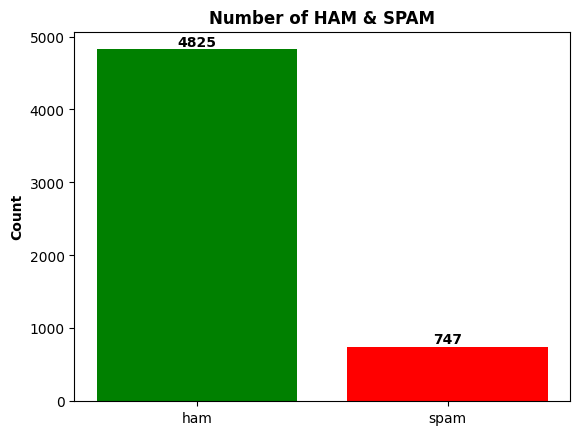

In [ ]:
x=df1['v1']
value_counts = df1['v1'].value_counts()
colors=['g','r']
plt.bar(value_counts.index, value_counts.values,color=colors)

for index, value in enumerate(value_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom',fontweight='bold')
# plt.bar(x,y)
plt.title("Number of HAM & SPAM",fontsize=12,fontweight='bold')
plt.ylabel("Count",fontsize=10,fontweight='bold')
plt.show()

**In v1 column we will convert ham emails to 1 and spam to 0 , which will be easy to train the model**

In [ ]:
df["v1"]=df["v1"].replace('spam', 0)
df["v1"]=df["v1"].replace('ham', 1)

In [ ]:
df

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
df.dtypes
#hence the values are replaced successfully.

v1     int64
v2    object
dtype: object

In [ ]:
x = df['v2'] # independent variable , which will work as i/p
y = df['v1'] # target variable , which will work as output
print(x)
print("\n")
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64


**Splitting the data set into training and testing**

In [ ]:
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train # 80% of our data from one column is allocated to train the model

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: v2, Length: 4457, dtype: object

In [ ]:
y_test # 20% of our data is aloocated to test the model

4456    1
690     1
944     1
3768    1
1189    1
       ..
2906    1
1270    1
3944    1
2124    1
253     1
Name: v1, Length: 1115, dtype: int64

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english' , lowercase = True)

In [ ]:
x_train_feature = feature_extraction.fit_transform(x_train)

In [ ]:
x_test_feature= feature_extraction.transform(x_test)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

#**Creating Logistic Regression model**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train_feature, y_train)

LogisticRegression()

**Models Accuracy on Training dataset**

In [ ]:
prediction_on_training_data = model.predict(x_train_feature)

In [ ]:
accuracyn_on_training_data = accuracy_score(y_train,prediction_on_training_data)

In [ ]:
accuracyn_on_training_data

0.9699349338119811

Models Accuracy on Testing dataset

In [ ]:
prediction_on_testing_data = model.predict(x_test_feature)

In [ ]:
accuracyn_on_testing_data = accuracy_score(y_test,prediction_on_testing_data)

In [ ]:
accuracyn_on_testing_data

0.9560538116591928

# Testing The model with custom emails .

- 0 : Spam
- 1 : Ham

In [ ]:
ham_email=['''Dear [Recipient's Name],

We hope this email finds you well. This is a test email sent to evaluate the functionality and performance of our email system. We are continuously working to enhance our communication processes to ensure that you receive our messages seamlessly.

Please disregard the content of this email, as it is intended solely for testing purposes. No action is required on your part. If you encounter any issues or anomalies while receiving or opening this email, kindly inform our technical support team at [support@email.com]. Your feedback is invaluable in helping us improve our services.

Thank you for your cooperation, and we look forward to providing you with the best experience possible.''']

In [ ]:
spam_email=['''Congratulations! You have been chosen as the recipient of our exclusive giveaway. You've won a lavish trip for two to a faraway place. Simply click the link below and enter your information to claim your prize.To collect your prize, go here: [spammy-link]Be quick! This deal is only available while supplies last. Don't pass up this fantastic chance!best wishesThe Prize Distribution Group''']

In [ ]:
input1= feature_extraction.transform(spam_email)
input2= feature_extraction.transform(ham_email)

In [ ]:
# for spam email
prediction1 = model.predict(input1)
print(prediction1)

[0]


In [ ]:
prediction2 = model.predict(input2)
print(prediction2)

[1]


In [ ]:
spammail=['''you have won 10000$.claim it now''']
input3= feature_extraction.transform(spammail)
prediction3 = model.predict(input3)
print(prediction3)

[0]


In [ ]:
hammail=['''this is your hod from college.
you had not submitted your project work.
kindly submit it by as soon as possible else you will be terminated from college.''']
input4= feature_extraction.transform(hammail)
prediction4 = model.predict(input4)
print(prediction4)

[1]


#**CONCLUSION**

**As The Model Is Giving The Output Correctly, It Is Clearly Seen That The Model Is Working Fine**

**In summary, the email spam detection model has proven its efficacy across a variety of inputs, exhibiting consistent and accurate performance. This achievement underscores the model's robustness and its potential to effectively identify and filter out spam emails. While the current success is promising, it's essential to remain vigilant, as the landscape of spam is ever-evolving. Regular updates and user feedback will be vital to ensure the model's continued accuracy and relevance in combating spam emails. This accomplishment marks a significant step toward creating a safer and more streamlined digital communication experience.**